In [51]:
import librosa
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

datapath = "/home/tiz007/228_data/UrbanSound8K/audio/"
labelpath = "/home/tiz007/228_data/UrbanSound8K/metadata/UrbanSound8K.csv"


In [34]:
folds = ["fold{}".format(i) for i in range(1,11) ]
foldspath = os.path.join(datapath, folds[0])
audiospath = os.listdir(foldspath)

In [42]:
temp_path = os.path.join(foldspath, audiospath[0])
audio, sr = librosa.load(temp_path)

In [43]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr)

In [49]:
melspec = librosa.feature.melspectrogram(y=audio, sr=sr)

In [29]:
filenames = []
class_id = []
with open(labelpath) as csvfile:
    reader = csv.reader(csvfile)
    raw = list(reader)
    
    for row in raw[1:]:
        filenames.append(row[0])
        class_id.append(int(row[-2]))


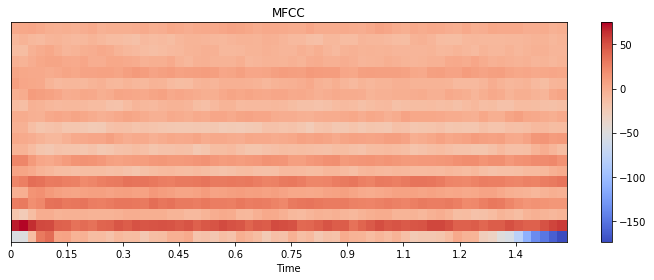

In [47]:

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

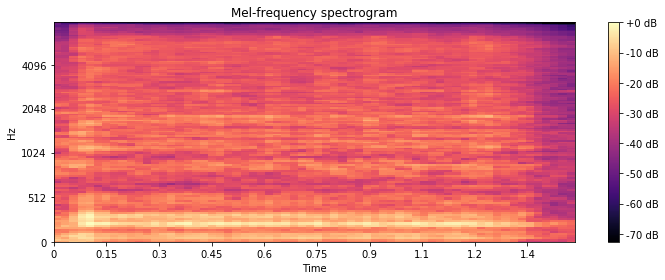

In [54]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()